In [ ]:
!pip install graphviz

## IT IS COMING HOME TREE!

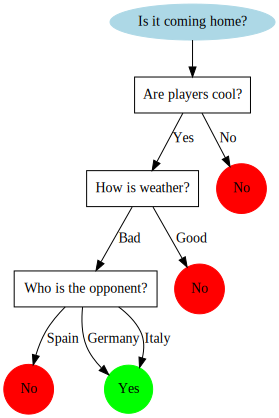

In [ ]:
from graphviz import Digraph

styles = {
    'top': {'shape': 'ellipse', 'style': 'filled', 'color': 'lightblue'},
    'no':  {'shape': 'circle', 'style': 'filled', 'color': 'red'},
    'yes': {'shape': 'circle', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}

england_tree = Digraph()

england_tree.node('top', 'Is it coming home?', styles['top'])
england_tree.node('q1', 'Are players cool?', styles['qst'])

england_tree.node('q2', 'How is weather?', styles['qst'])
england_tree.node('no1', 'No ', styles['no'])

england_tree.node('q3', 'Who is the opponent?', styles['qst'])
england_tree.node('no2', 'No ', styles['no'])

england_tree.node('no3', 'No ', styles['no'])
england_tree.node('yes', 'Yes', styles['yes'])

england_tree.edge('top', 'q1')

england_tree.edge('q1', 'q2', 'Yes')
england_tree.edge('q1', 'no1', 'No')

england_tree.edge('q2', 'q3', 'Bad')
england_tree.edge('q2', 'no2', 'Good')

england_tree.edge('q3', 'yes', 'Germany')
england_tree.edge('q3', 'no3', 'Spain')
england_tree.edge('q3', 'yes', 'Italy')

england_tree




#Entropy Method Implementation 

Example below is direct implementation of Entropy caculation — remember these you don't implement manually when you build a tree, Sklearn does it for you (I am not suggesting that is because you're lazy!). 

$H(S) = -\sum_{i=1}^{C}p_i\log p_i$, where $C$ is the classes in a dataset.


In [ ]:
from math import log

def entropy(*probabilities):
 
  try:
    total = sum(probabilities)
    return sum([-p / total * log(p / total, 2) for p in probabilities])
  except:
    return 0

print(entropy(6, 5), entropy(1, 2), entropy(2, 2), entropy (9,5), entropy (5,0))

0.9940302114769565 0.9182958340544896 1.0 0.9402859586706309 0


# The MNIST Dataset


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.data.shape)

(1797, 64)


# Notes
* `digits.images` is a numpy array with 1797 numpy arrays 8x8 (feature vectors) representing digits
* `digits.data` is a numpy array with 1797 x 64 (feature vectors) representing a flattened matrix of the digit images. 
* `digits.target` is a numpy array with 1797 integer numbers (class labels). 

Code below allows us to visualize a random digit from the dataset, and also the features matrix — as you keep running the code, eact time you will print a number at random. 

## Loading and visualisaing digits
Example below. 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


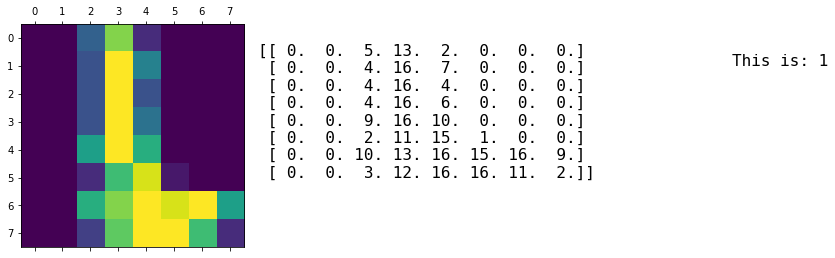

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# get a random index from 0 to dataset size
random_index = np.random.randint(1796)


# draw random digit
plt.matshow(digits.images[random_index])

# and print the corresponding matrix (attributes)
plt.text(8, 5, digits.images[random_index],
         fontdict={'family': 'monospace', 'size': 16})

# and the label
plt.text(25, 1, "This is: {}".format(digits.target[random_index]),
         fontdict={'family': 'monospace', 'size': 16});

In [ ]:
print(digits.images.shape)

(1797, 8, 8)


Note that the dataset is shapped in an $8 \times 8$ matrix (this is a 3d matrix) — you may need to reshape it (say, flatten the 64 pixels in a row) with the `.reshape ` method of Numpy. 

In [ ]:
print(digits.images.reshape((1797, -1)).shape)

(1797, 64)


In [ ]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 20, 30]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.923 (0.023)


In [ ]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

KeyboardInterrupt: ignored